In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,EG,126,0.2,1,1,0,10.00,0
1,PT,126,18.6,1,1,0,16.00,0
2,PK,176,466.2,5,2,1,13.59,0
3,NG,129,44.9,1,1,1,5.18,0
4,PK,123,17.7,1,1,0,16.00,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17652 non-null  object 
 1   days_on_platform        17661 non-null  int64  
 2   minutes_watched         17661 non-null  float64
 3   courses_started         17661 non-null  int64  
 4   practice_exams_started  17661 non-null  int64  
 5   practice_exams_passed   17661 non-null  int64  
 6   minutes_spent_on_exams  17661 non-null  float64
 7   purchased               17661 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [5]:
train_data.isnull().sum()

student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [6]:
train_data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000
mean,122.950909,30.614144,1.193081,0.269690,0.170659,1.191348,0.091614
std,90.701835,89.197582,0.639029,1.659088,1.097656,7.729778,0.288489
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,203.000000,33.900000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


In [7]:
train_data['purchased'].value_counts()

0    16043
1     1618
Name: purchased, dtype: int64

In [8]:
train_lab = train_data[['days_on_platform','minutes_watched','courses_started','practice_exams_started','practice_exams_passed','minutes_spent_on_exams']]
train_tar = train_data['purchased']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_lab, train_tar, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
# clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=4, min_samples_leaf=5)
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [10]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training features and labels
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.Logit(y_train, X_train)
result = model.fit()

# Get the summary of the logistic regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.155647
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              purchased   No. Observations:                14128
Model:                          Logit   Df Residuals:                    14121
Method:                           MLE   Df Model:                            6
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.4895
Time:                        09:19:19   Log-Likelihood:                -2199.0
converged:                       True   LL-Null:                       -4307.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3536      0.089     -3.972      0.000      -0.528     

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assuming you have already trained the Decision Tree Classifier and made predictions
# using X_test and y_pred

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

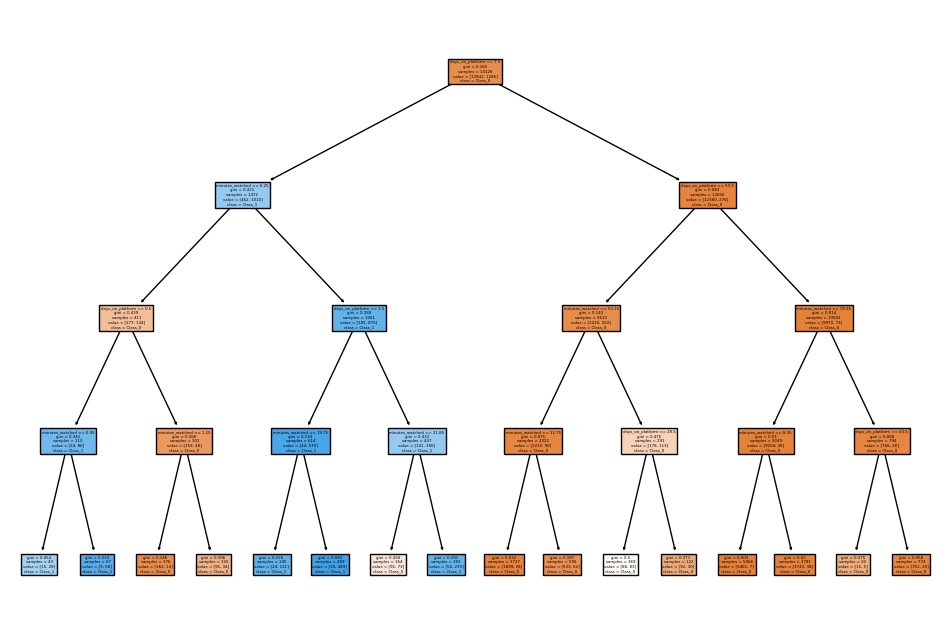

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

feature_name = ['days_on_platform','minutes_watched','courses_started','practice_exams_started','practice_exams_passed','minutes_spent_on_exams']
class_names = ['Class_0', 'Class_1']

# Visualize the tree using plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names= feature_name, class_names=class_names)
plt.show()


Precision: 0.9600176926848638
Recall: 0.9617888480045287
F1 Score: 0.9602884421315823


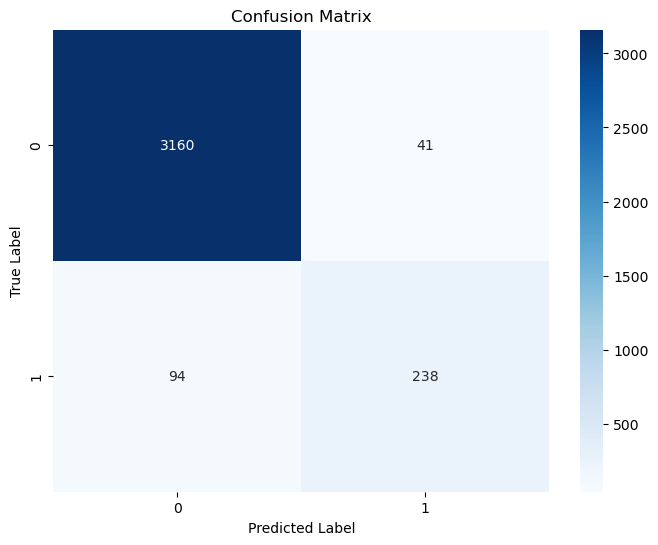

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.85      0.72      0.78       332

    accuracy                           0.96      3533
   macro avg       0.91      0.85      0.88      3533
weighted avg       0.96      0.96      0.96      3533



In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Alternatively, you can use classification_report for a detailed report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
